In [58]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.nn.utils import parameters_to_vector, vector_to_parameters
from torch.autograd import Variable

In [2]:
torch.manual_seed(1)

In [3]:
# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=False)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

print("train_dataset size:", len(train_dataset),"\ntest_dataset size:", len(test_dataset))

train_dataset size: 60000 
test_dataset size: 10000


In [4]:
# Data loader func
def train_loader(batch_size):
    train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size = batch_size, 
                                           shuffle=True)
    return train_loader


def test_loader(batch_size):
    test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)
    return test_loader

In [5]:
class M1(nn.Module):
    def __init__(self,):
        super(M1, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(256, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        # flatten as one dimension
        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))

        x = self.fc3(x)
        return x

In [6]:
#train function
def trainFunc(model,num_epochs,train_batch_size):
    model.train()
    print('strated')
    train_load = train_loader(train_batch_size)
    n_total_steps = len(train_load)
    train_losses = []
    train_epoch = []
    train_acc = []
    not_converged =True
    epoch = 0
    while not_converged:
        epoch += 1
        n_correct = 0
        n_samples = 0
        for i, (images, labels) in enumerate(train_load):  
            
            images, labels = Variable(images),Variable(labels)
            # Forward pass
            prediction = model(images)
            loss = loss_func(prediction, labels)
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            
            optimizer.step()

            _, predicted = torch.max(prediction.data, 1)
            n_samples += labels.size(0)
            n_correct += (predicted == labels).sum().item()
            acc = 100.0 * n_correct / n_samples

            train_losses.append(loss.item())
            train_acc.append(acc)
            train_epoch.append(epoch)

            if (i+1) % 60 == 0:
                print (f'Train O/P: Epoch [{epoch}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')
   
                if epoch == num_epochs:
                        print("Max Epoch Reached")
                        not_converged = False
                elif (epoch > 5) and  (train_losses[-1] < 0.001):
                    if abs(train_losses[-3] - train_losses[-2]) < 1.0e-05 and abs(train_losses[-2] - train_losses[-1]) < 1.0e-05:
                        print("Convergeance reached for loss:",train_losses[-1])
                        not_converged = False
                        
    return train_epoch,train_losses,train_acc

In [59]:
# Training Model with batch size=64
torch.manual_seed(1)

learning_rate = 1e-3
mBatch1 = M1()
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mBatch1.parameters(), lr=learning_rate) #, weight_decay = weight_decay_val)

a=[]
for i in mBatch1.parameters():
    a.append(torch.numel(i))
print(f'Total no of parameters in Model with batch_size={64} is:{np.sum(a)}')

Total no of parameters in Model with batch_size=64 is:44426


In [8]:
max_epochs = 15
train_batch_size = 64
B1_train_epoch,B1_train_losses,B1_train_acc = trainFunc(mBatch1,max_epochs,train_batch_size)

strated
60
Train O/P: Epoch [1/15], Step [60/938], Loss: 0.7895
120
Train O/P: Epoch [1/15], Step [120/938], Loss: 0.4790
180
Train O/P: Epoch [1/15], Step [180/938], Loss: 0.3199
240
Train O/P: Epoch [1/15], Step [240/938], Loss: 0.3646
300
Train O/P: Epoch [1/15], Step [300/938], Loss: 0.2332
360
Train O/P: Epoch [1/15], Step [360/938], Loss: 0.1718
420
Train O/P: Epoch [1/15], Step [420/938], Loss: 0.2433
480
Train O/P: Epoch [1/15], Step [480/938], Loss: 0.1388
540
Train O/P: Epoch [1/15], Step [540/938], Loss: 0.0672
600
Train O/P: Epoch [1/15], Step [600/938], Loss: 0.0961
660
Train O/P: Epoch [1/15], Step [660/938], Loss: 0.2539
720
Train O/P: Epoch [1/15], Step [720/938], Loss: 0.0967
780
Train O/P: Epoch [1/15], Step [780/938], Loss: 0.0556
840
Train O/P: Epoch [1/15], Step [840/938], Loss: 0.1883
900
Train O/P: Epoch [1/15], Step [900/938], Loss: 0.0545
60
Train O/P: Epoch [2/15], Step [60/938], Loss: 0.2019
120
Train O/P: Epoch [2/15], Step [120/938], Loss: 0.2731
180
Train 

In [60]:
# Training Model with batch size=1000
torch.manual_seed(1)

learning_rate = 1e-3
mBatch2 = M1()
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mBatch2.parameters(), lr=learning_rate) 

a=[]
for i in mBatch2.parameters():
    a.append(torch.numel(i))
print(f'Total no of parameters in Model with batch_size={1000} is:{np.sum(a)}')

Total no of parameters in Model with batch_size=1000 is:44426


In [10]:
max_epochs = 15
train_batch_size = 1000
B2_train_epoch,B2_train_losses,B2_train_acc = trainFunc(mBatch2,max_epochs,train_batch_size)

strated
60
Train O/P: Epoch [1/15], Step [60/60], Loss: 0.4068
60
Train O/P: Epoch [2/15], Step [60/60], Loss: 0.2528
60
Train O/P: Epoch [3/15], Step [60/60], Loss: 0.1980
60
Train O/P: Epoch [4/15], Step [60/60], Loss: 0.1600
60
Train O/P: Epoch [5/15], Step [60/60], Loss: 0.0876
60
Train O/P: Epoch [6/15], Step [60/60], Loss: 0.0854
60
Train O/P: Epoch [7/15], Step [60/60], Loss: 0.0776
60
Train O/P: Epoch [8/15], Step [60/60], Loss: 0.0991
60
Train O/P: Epoch [9/15], Step [60/60], Loss: 0.0736
60
Train O/P: Epoch [10/15], Step [60/60], Loss: 0.0955
60
Train O/P: Epoch [11/15], Step [60/60], Loss: 0.0578
60
Train O/P: Epoch [12/15], Step [60/60], Loss: 0.0493
60
Train O/P: Epoch [13/15], Step [60/60], Loss: 0.0492
60
Train O/P: Epoch [14/15], Step [60/60], Loss: 0.0379
60
Train O/P: Epoch [15/15], Step [60/60], Loss: 0.0436
Max Epoch Reached


In [11]:
len(B1_train_losses)

14070

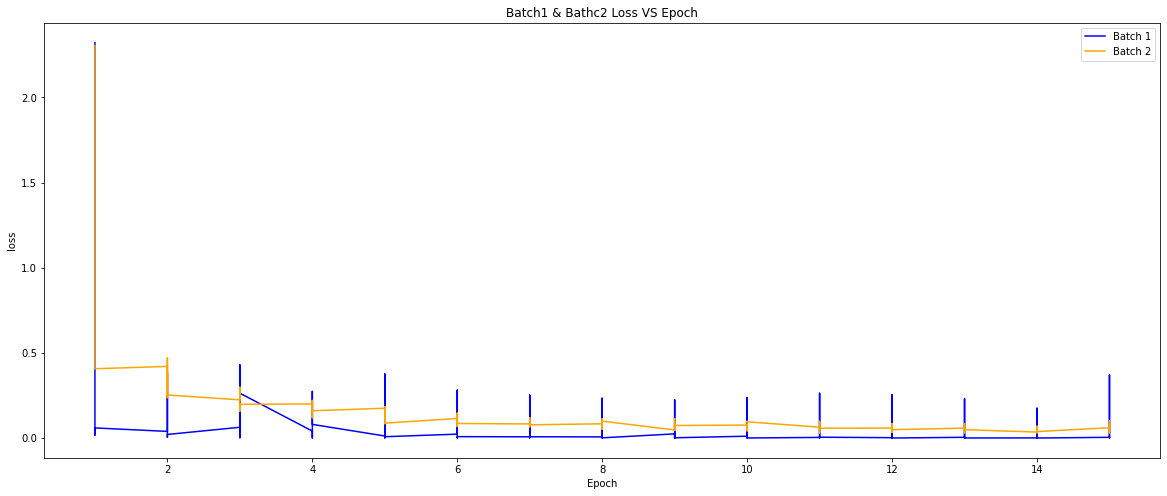

In [12]:
#Plotting Loss plot for both Batch 1 and Batch 2 models
#B2_train_epoch,B2_train_losses,B2_train_acc
plt.figure(figsize=(20, 8))
plt.plot(B1_train_epoch,B1_train_losses,color="blue")
plt.plot(B2_train_epoch,B2_train_losses,color="orange")
plt.title('Batch1 & Bathc2 Loss VS Epoch')
plt.legend(['Batch 1','Batch 2'])
plt.xlabel ('Epoch')
plt.ylabel ('loss')
plt.show()

In [13]:
print(np.min(B1_train_losses),np.min(B2_train_losses))

6.761238637409406e-06 0.029463745653629303


In [14]:
batch1_param = torch.nn.utils.parameters_to_vector(mBatch1.parameters())
print(batch1_param,'\nlen:',len(batch1_param))

tensor([ 0.1452, -0.0717, -0.1808,  ..., -0.1341,  0.2035, -0.1281],
       grad_fn=<CatBackward0>) 
len: 44426


In [15]:
batch2_param = torch.nn.utils.parameters_to_vector(mBatch2.parameters())
print(batch2_param,'\nlen:',len(batch2_param))

tensor([ 0.0721,  0.1232,  0.0316,  ..., -0.1095,  0.0069,  0.0353],
       grad_fn=<CatBackward0>) 
len: 44426


In [16]:
alpha = np.linspace(-2.0, 2.0, num=21)
print(alpha)

[-2.  -1.8 -1.6 -1.4 -1.2 -1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6
  0.8  1.   1.2  1.4  1.6  1.8  2. ]


In [17]:
thetaArr =[]
for i in range (len(alpha)):
    theta = (1-alpha[i])*batch1_param + alpha[i]*batch2_param
    thetaArr.append(theta)

In [18]:
class ThetaModel(nn.Module):
    def __init__(self,):
        super(ThetaModel, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(256, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        # flatten as one dimension
        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))

        x = self.fc3(x)
        return x

In [61]:
def testFunction(model,loss_func,test_batch_size): 
    test_load = test_loader(test_batch_size)
    model.eval()
    with torch.no_grad():
        n_correct = 0
        n_samples = 0
        testLoss = 0
        for images, labels in test_load:
            images, labels = Variable(images),Variable(labels)
            
            prediction = model(images.view(-1,784))
            testLoss += loss_func(prediction,labels).item()
            # max returns (value ,index)
            _, predicted = torch.max(prediction.data, 1)
            n_samples += labels.size(0)
            n_correct += (predicted == labels).sum().item()
    netTest_loss = testLoss/n_samples
    netTest_acc1 = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the test images: {netTest_acc1} & Test Loss: {netTest_loss} %')
    return netTest_acc1, netTest_loss

In [23]:
import copy

In [42]:
modelsTrainEpochArr = []
modelsTrainLossArr = []
modelsTrainAccArr = []
modelsTestLossArr = []
modelsTestAccArr = []

for i in range (len(thetaArr)):
    torch.manual_seed(1)
    j=copy.deepcopy(i) 
    theta = (1-alpha[i])*batch1_param + alpha[i]*batch2_param
    j = ThetaModel()
    torch.nn.utils.vector_to_parameters(theta,j.parameters())
    loss_func = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(j.parameters(), lr=1e-3, weight_decay = 1e-3)

    a=[]
    for k in j.parameters():
        a.append(torch.numel(k))
    print(f'Total no of parameters in Model Theta {i} is:{np.sum(a)}')

    print(j.parameters)

    max_epochs = 10
    train_batch_size = 600
    T_train_epoch,T_train_losses,T_train_acc = trainFunc(j,max_epochs,train_batch_size)
    
    
    modelsTrainEpochArr.append(T_train_epoch)
    modelsTrainLossArr.append(T_train_losses)
    modelsTrainAccArr.append(T_train_acc)
    
    test_batch_size=100
    T_acc, T_testLoss = testFunction(j,loss_func,test_batch_size)
    modelsTestAccArr.append(T_acc)
    modelsTestLossArr.append(T_testLoss)




Total no of parameters in Model Theta 0 is:44426
<bound method Module.parameters of ThetaModel(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)>
strated
60
Train O/P: Epoch [1/10], Step [60/100], Loss: 7.7941
60
Train O/P: Epoch [2/10], Step [60/100], Loss: 0.1293
60
Train O/P: Epoch [3/10], Step [60/100], Loss: 0.1146
60
Train O/P: Epoch [4/10], Step [60/100], Loss: 0.3483
60
Train O/P: Epoch [5/10], Step [60/100], Loss: 0.0512
60
Train O/P: Epoch [6/10], Step [60/100], Loss: 0.0000
60
Train O/P: Epoch [7/10], Step [60/100], Loss: 0.4781
60
Train O/P: Epoch [8/10], Step [60/100], Loss: 0.2974
60
Train O/P: Epoch [9/10], Step [60/100], Loss: 0.0000
Convergeance reached for loss: 0.0
Accuracy of the network: 98.82 %
Accuracy of 0: 99.5

In [43]:
len(modelsTrainAccArr)

21

In [44]:
def meanScore(dataArr):
    meanModelData = []
    for i in range (len(dataArr)):
        meanScore = np.mean(dataArr[i])
        meanModelData.append(meanScore)
    return meanModelData

def minScore(dataArr):
    minModelScore = []
    for i in range (len(dataArr)):
        minScore = np.mean(dataArr[i])
        minModelScore.append(minScore)
    return minModelScore

def maxScore(dataArr):
    maxModelScore = []
    for i in range (len(dataArr)):
        maxScore = np.max(dataArr[i])
        maxModelScore.append(maxScore)
    return maxModelScore


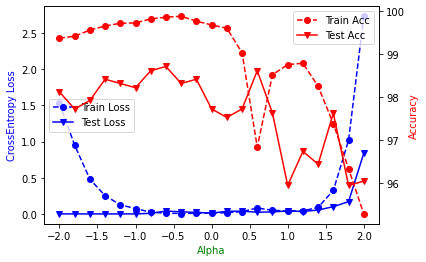

In [45]:
fig,ax=plt.subplots()
ax.plot(alpha,minScore(modelsTrainLossArr),color="Blue",linestyle='dashed', marker="o")
ax.plot(alpha,modelsTestLossArr,color="Blue", marker="v")
ax.legend(['Train Loss','Test Loss'],loc="center left")
ax.set_xlabel("Alpha",color="Green")
ax.set_ylabel("CrossEntropy Loss",color = "blue")


ax2=ax.twinx()
ax2.plot(alpha,meanScore(modelsTrainAccArr),color="red",linestyle='dashed', marker="o")
ax2.plot(alpha,modelsTestAccArr,color="red", marker="v")
ax2.set_xlabel("Alpha",color="Green")
ax2.set_ylabel("Accuracy",color = "red")
ax2.legend(['Train Acc','Test Acc'],loc="upper right")

plt.show()
fig.savefig('D:/Clemson/COURSE/SEM-2/CPSC-8430 Deep Learning - 001/Homework/CPSC-8430-Deep-Learning-001/HW1/Diff Batch Graph HW1_3.1-2.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

In [62]:
# Training Model with batch size=600 and Lr 1e-3
torch.manual_seed(1)

learning_rate = 1e-3
mLr1 = M1()
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mLr1.parameters(), lr=learning_rate) 

a=[]
for i in mLr1.parameters():
    a.append(torch.numel(i))
print(f'Total no of parameters in Model with batch_size={600} is:{np.sum(a)}')

Total no of parameters in Model with batch_size=600 is:44426


In [47]:
max_epochs = 15
train_batch_size = 600
L1_train_epoch,L1_train_losses,L1_train_acc = trainFunc(mLr1,max_epochs,train_batch_size)

strated
60
Train O/P: Epoch [1/15], Step [60/100], Loss: 0.4467
60
Train O/P: Epoch [2/15], Step [60/100], Loss: 0.2091
60
Train O/P: Epoch [3/15], Step [60/100], Loss: 0.1739
60
Train O/P: Epoch [4/15], Step [60/100], Loss: 0.1380
60
Train O/P: Epoch [5/15], Step [60/100], Loss: 0.0962
60
Train O/P: Epoch [6/15], Step [60/100], Loss: 0.0940
60
Train O/P: Epoch [7/15], Step [60/100], Loss: 0.0603
60
Train O/P: Epoch [8/15], Step [60/100], Loss: 0.0595
60
Train O/P: Epoch [9/15], Step [60/100], Loss: 0.0451
60
Train O/P: Epoch [10/15], Step [60/100], Loss: 0.0813
60
Train O/P: Epoch [11/15], Step [60/100], Loss: 0.0764
60
Train O/P: Epoch [12/15], Step [60/100], Loss: 0.0654
60
Train O/P: Epoch [13/15], Step [60/100], Loss: 0.0282
60
Train O/P: Epoch [14/15], Step [60/100], Loss: 0.0254
60
Train O/P: Epoch [15/15], Step [60/100], Loss: 0.0519
Max Epoch Reached


In [48]:
Lr1_param = torch.nn.utils.parameters_to_vector(mLr1.parameters())
print(Lr1_param,'\nlen:',len(Lr1_param))

tensor([-0.2162, -0.0055,  0.1604,  ...,  0.0580,  0.0107,  0.0287],
       grad_fn=<CatBackward0>) 
len: 44426


In [63]:
# Training Model with batch size=600 and Lr 1e-2
torch.manual_seed(1)
learning_rate = 1e-2
mLr2 = M1()
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mLr2.parameters(), lr=learning_rate) 

a=[]
for i in mLr2.parameters():
    a.append(torch.numel(i))
print(f'Total no of parameters in Model with batch_size={600} is:{np.sum(a)}')

Total no of parameters in Model with batch_size=600 is:44426


In [64]:
max_epochs = 15
train_batch_size = 600
L2_train_epoch,L2_train_losses,L2_train_acc = trainFunc(mLr2,max_epochs,train_batch_size)

strated
60
Train O/P: Epoch [1/15], Step [60/100], Loss: 0.1449


KeyboardInterrupt: 

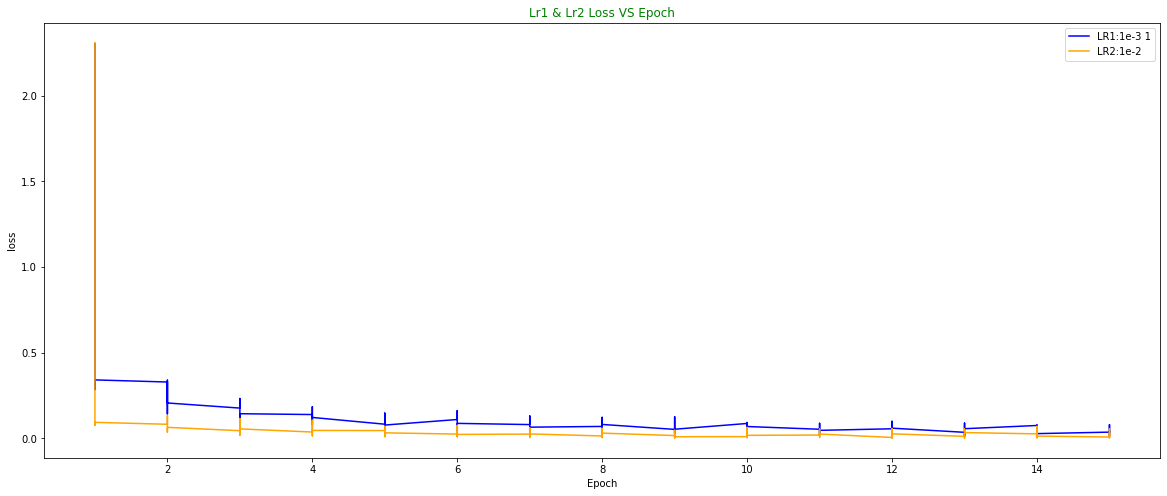

In [51]:
#Plotting Loss plot for both Batch 1 and Batch 2 models
plt.figure(figsize=(20, 8))
plt.plot(L1_train_epoch,L1_train_losses,color="blue")
plt.plot(L2_train_epoch,L2_train_losses,color="orange")
plt.title('Lr1 & Lr2 Loss VS Epoch',color="green")
plt.legend(['LR1:1e-3 1','LR2:1e-2'])
plt.xlabel ('Epoch')
plt.ylabel ('loss')
plt.show()

In [52]:
Lr2_param = torch.nn.utils.parameters_to_vector(mLr2.parameters())
print(Lr2_param,'\nlen:',len(Lr2_param))

tensor([-0.1537,  0.0506, -0.1578,  ..., -0.0158,  0.2174,  0.1149],
       grad_fn=<CatBackward0>) 
len: 44426


In [54]:
modelsTrainEpochArr2 = []
modelsTrainLossArr2 = []
modelsTrainAccArr2 = []
modelsTestLossArr2 = []
modelsTestAccArr2 = []

for i in range (len(thetaArr)):
    torch.manual_seed(1)
    j=copy.deepcopy(i) 
    theta = (1-alpha[i])*Lr1_param + alpha[i]*Lr2_param
    j = ThetaModel()
    torch.nn.utils.vector_to_parameters(theta,j.parameters())
    loss_func = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(j.parameters(), lr=1e-3) #,weight_decay = 0.025)

    a=[]
    for k in j.parameters():
        a.append(torch.numel(k))
    print(f'Total no of parameters in Model Theta {i} is:{np.sum(a)}')

    print(j.parameters)

    max_epochs = 10
    train_batch_size = 100
    T2_train_epoch,T2_train_losses,T2_train_acc = trainFunc(j,max_epochs,train_batch_size)
    
    
    modelsTrainEpochArr2.append(T2_train_epoch)
    modelsTrainLossArr2.append(T2_train_losses)
    modelsTrainAccArr2.append(T2_train_acc)
    
    test_batch_size=100
    T2_acc,T2_testLoss = testFunction(j,loss_func,test_batch_size)
    modelsTestAccArr2.append(T2_acc)
    modelsTestLossArr2.append(T2_testLoss)

Total no of parameters in Model Theta 0 is:44426
<bound method Module.parameters of ThetaModel(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)>
strated
60
Train O/P: Epoch [1/10], Step [60/600], Loss: 1637.4631
120
Train O/P: Epoch [1/10], Step [120/600], Loss: 418.1249
180
Train O/P: Epoch [1/10], Step [180/600], Loss: 368.0636
240
Train O/P: Epoch [1/10], Step [240/600], Loss: 300.8780
300
Train O/P: Epoch [1/10], Step [300/600], Loss: 230.1769
360
Train O/P: Epoch [1/10], Step [360/600], Loss: 171.9456
420
Train O/P: Epoch [1/10], Step [420/600], Loss: 201.8221
480
Train O/P: Epoch [1/10], Step [480/600], Loss: 105.0604
540
Train O/P: Epoch [1/10], Step [540/600], Loss: 127.8167
600
Train O/P: Epoch [1/10], Step [600/600], Loss: 8

In [55]:
minScore(modelsTrainLossArr2)

[310.1402684374017,
 172.59364071225968,
 89.17589414596391,
 42.78788178806028,
 18.62020404238436,
 6.873967383569505,
 2.131608360368283,
 0.4933437744478459,
 0.09109144894537377,
 0.03394285839404377,
 0.028886959449934996,
 0.03331263043906559,
 0.02082007058689184,
 0.008260503195342144,
 0.004136263995554228,
 0.0034190745792683033,
 0.004794595348309028,
 0.00991937046009258,
 0.029298394115174452,
 0.10251386178016751,
 0.2812579852127412]

In [56]:
meanScore(modelsTrainAccArr2)

[91.22106366204012,
 91.92085143539865,
 92.60466792681208,
 93.32766679830172,
 94.21690440118134,
 95.19674251867532,
 96.18443179571901,
 97.21484278329571,
 98.35542627233791,
 98.94332274667612,
 99.08626264149595,
 98.90442268149577,
 99.18195146041214,
 99.71884746556238,
 99.87382572256621,
 99.89638332909288,
 99.87554672531694,
 99.81411822392091,
 99.66834303004914,
 99.36680332772698,
 99.04475320249861]

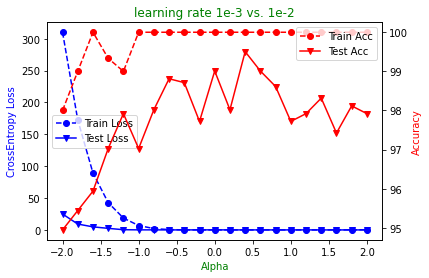

In [57]:
fig,ax=plt.subplots()
ax.plot(alpha,minScore(modelsTrainLossArr2),color="Blue",linestyle='dashed', marker="o")
ax.plot(alpha,modelsTestLossArr2,color="Blue", marker="v")
ax.legend(['Train Loss','Test Loss'],loc="center left")
ax.set_xlabel("Alpha",color="Green")
ax.set_ylabel("CrossEntropy Loss",color = "blue")
ax.set_title("learning rate 1e-3 vs. 1e-2",color = "green")


ax2=ax.twinx()
ax2.plot(alpha,maxScore(modelsTrainAccArr2),color="red",linestyle='dashed', marker="o")
ax2.plot(alpha,modelsTestAccArr2,color="red", marker="v")
ax2.set_xlabel("Alpha",color="Green")
ax2.set_ylabel("Accuracy",color = "red")
ax2.legend(['Train Acc','Test Acc'],loc="upper right")

plt.show()
fig.savefig('D:/Clemson/COURSE/SEM-2/CPSC-8430 Deep Learning - 001/Homework/CPSC-8430-Deep-Learning-001/HW1/Diff Batch Graph HW1_3.1Lr.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')